In [1]:
#!pip install -U pandasql
import pandas as pd
import numpy as np
from pandasql import sqldf

import matplotlib.pyplot as plt                        
import seaborn as sns
from seaborn.linearmodels import corrplot
from collections import Counter
import folium
import matplotlib
from matplotlib.colors import ListedColormap
import seaborn as sns

from IPython.display import Image


matplotlib.style.use('ggplot')

%matplotlib inline 

pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

# 1.3 Internet Shutdowns

Metric: Number of Internet shutdowns in 2017.
Internet shutdowns measured by AccessNow. We need to figure out when to last update the 2017 numbers (last year it was end of October).
Aggregate the data by scope (full net or specific services)
Length of shutdowns

In [252]:
Internet_Shutdowns = pd.read_csv('./data/1.3 Internet Shutdowns copia.csv')

In [253]:
Internet_Shutdowns   #Falta el change over year

,year,y2015,y2016,y2017,yoy_change
0,Shutdowns,15.0,56,58,3.57%
1,Countries,NaN,25,20,-20.00%


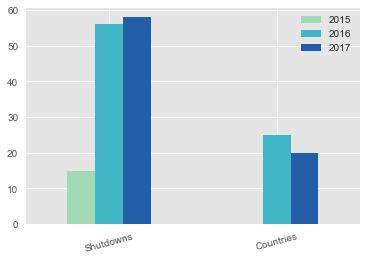

In [430]:
df2 = pd.DataFrame(Internet_Shutdowns, columns=['y2015', 'y2016', 'y2017'])

df2.plot(kind='bar', 
           x=Internet_Shutdowns['year'],rot=15, color=['#a1dab4', '#41b6c4', '#225ea8'])
plt.xlabel('')
plt.ylabel('')
plt.legend(['2015', '2016', '2017'])

# 1.4 Open Data Barometer
### Dataset 1: Ranking of open data barometer in 2016

In [256]:
Open_Data_Barometer = pd.read_csv('./data/1.4 Open Data Barometer_a.csv')

In [257]:
Open_Data_Barometer.head()

,year,region,iso2,iso3,ODB-Rank,country,ODB-Score-Scaled,ODB-Score-Change,Rank-Change
0,2016,Europe & Central Asia,GB,GBR,1,United Kingdom,100.00,0.00,0.0
1,2016,North America,CA,CAN,2,Canada,89.54,9.19,2.0
2,2016,Europe & Central Asia,FR,FRA,3,France,85.13,3.48,-1.0
3,2016,North America,US,USA,4,United States of America,81.62,-0.27,-2.0
4,2016,East Asia & Pacific,KR,KOR,5,Korea,81.16,9.97,3.0


In [259]:
Open_Data_Barometer['year'].unique()

array([2016])

In [261]:
#Open_Data_Barometer.loc[(Open_Data_Barometer['Country'] == 'wfwefwefwef'), ['Country']] = "Cote d'ivoire"
Open_Data_Barometer.loc[Open_Data_Barometer['country'] == 'United States of America']

,year,region,iso2,iso3,ODB-Rank,country,ODB-Score-Scaled,ODB-Score-Change,Rank-Change
3,2016,North America,US,USA,4,United States of America,81.62,-0.27,-2.0


### Dataset 2: Availabity of type of data by quarters (Data from Open Data Barometer) of 2016

In [301]:
Open_Data_Barometer_b = pd.read_csv('./data/1.4 Open Data Barometer_b copia.csv')

In [302]:
Open_Data_Barometer_b

,Availability of data,Barometer 4th ed.,Barometer 3rd ed.,Barometer 2nd ed.,Barometer 1st ed.
0,Open data,-7,10,10,7
1,Machine readable,-53,55,41,37
2,Openly licensed,26,24,14,12


In [306]:
#a = Open_Data_Barometer_b[(Open_Data_Barometer_b['type_of_data'] == 'Open Data')]

In [299]:
#df2 = pd.DataFrame(a, columns=['percentage'])
#df2.plot(kind='bar',            x=a['edition'],rot=15, color=['#addd8e'], legend=False)
#plt.xlabel('')
#plt.ylabel('Open Data')

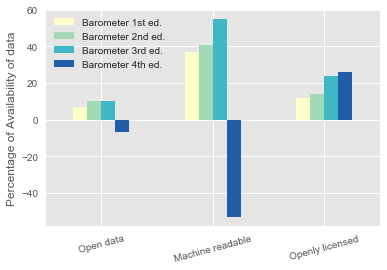

In [431]:
#df2 = pd.DataFrame(Open_Data_Barometer_b, columns=Open_Data_Barometer_b.columns[1:])
df2 = pd.DataFrame(Open_Data_Barometer_b, columns=['Barometer 1st ed.', 'Barometer 2nd ed.', 'Barometer 3rd ed.', 'Barometer 4th ed.'])

df2.plot(kind='bar', 
           x=Open_Data_Barometer_b['Availability of data'],rot=15, color=['#ffffcc', '#a1dab4', '#41b6c4', '#225ea8'])
plt.xlabel('')
plt.ylabel('Percentage of Availability of data')

### Dataset 3: % of open datasets published by all governments by quarters

In [451]:
Open_Data_Barometer_c = pd.read_csv('./data/1.4 Open Data Barometer_c copia.csv')

In [452]:
Open_Data_Barometer_c

,Datasets,4th ed % of open datasets publishedby all governments,3rd ed % of open datasets publishedby all governments,2nd ed % of open datasets publishedby all governments,1st ed % of open datasets publishedby all governments
0,Budget,10,18,13,9.0
1,Company registries,5,1,3,4.0
2,Spending,3,2,9,6.0
3,Contracting,3,8,6,NaN
4,Land ownership,1,5,3,4.0


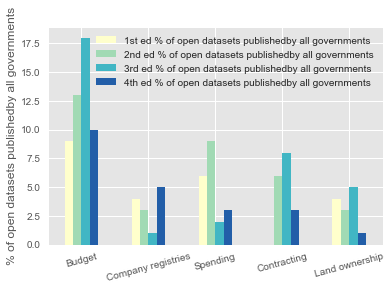

In [455]:
df2 = pd.DataFrame(Open_Data_Barometer_c, columns=['1st ed % of open datasets publishedby all governments', '2nd ed % of open datasets publishedby all governments', '3rd ed % of open datasets publishedby all governments', '4th ed % of open datasets publishedby all governments'])
#df2 = pd.DataFrame(Open_Data_Barometer_c, columns=Open_Data_Barometer_c.columns[1:])
df2.plot(kind='bar', 
           x=Open_Data_Barometer_c['Datasets'],rot=15, color=['#ffffcc', '#a1dab4', '#41b6c4', '#225ea8'])
plt.xlabel('')
plt.ylabel('% of open datasets publishedby all governments')

# 1.5 Transparency Reporting Index

In [333]:
Transparency_Reporting_Index = pd.read_csv('./data/1.5 Transparency Reporting Index.csv')
Transparency_Reporting_Index.head(2)

,Company Name,Company Platform,First Release,Frequency,Country of Headquarters,Region of Headquarters,Company URL
0,AOL,Internet,2/13/14,6 months,USA,North America,http://blog.aol.com/tag/transparency/
1,Adobe,Internet,3/12/15,Annually,USA,North America,http://www.adobe.com/legal/lawenforcementreque...


In [134]:
Transparency_Reporting_Index['Country of Headquarters'].unique()

array(['USA', 'Romania', 'South Korea', 'Germany', 'Netherlands', 'France',
       nan, 'Canada', 'Switzerland', 'Norway', 'Sweden', 'Australia',
       'New Zealand', 'United Kingdom'], dtype=object)

In [ ]:
Transparency_Reporting_Index['iso3'] = np.nan
Transparency_Reporting_Index.loc[Transparency_Reporting_Index['Country of Headquarters'] == 'USA', 'iso3'] = 'USA'
Transparency_Reporting_Index.loc[Transparency_Reporting_Index['Country of Headquarters'] == 'Romania', 'iso3'] = 'ROU'
Transparency_Reporting_Index.loc[Transparency_Reporting_Index['Country of Headquarters'] == 'South Korea', 'iso3'] = 'KOR'
Transparency_Reporting_Index.loc[Transparency_Reporting_Index['Country of Headquarters'] == 'Germany', 'iso3'] = 'DEU'
Transparency_Reporting_Index.loc[Transparency_Reporting_Index['Country of Headquarters'] == 'Netherlands', 'iso3'] = 'NLD'
Transparency_Reporting_Index.loc[Transparency_Reporting_Index['Country of Headquarters'] == 'France', 'iso3'] = 'FRA'
Transparency_Reporting_Index.loc[Transparency_Reporting_Index['Country of Headquarters'] == 'Canada', 'iso3'] = 'CAN'
Transparency_Reporting_Index.loc[Transparency_Reporting_Index['Country of Headquarters'] == 'Switzerland', 'iso3'] = 'CHE'
Transparency_Reporting_Index.loc[Transparency_Reporting_Index['Country of Headquarters'] == 'Norway', 'iso3'] = 'NOR'
Transparency_Reporting_Index.loc[Transparency_Reporting_Index['Country of Headquarters'] == 'Sweden', 'iso3'] = 'SWE'
Transparency_Reporting_Index.loc[Transparency_Reporting_Index['Country of Headquarters'] == 'Australia', 'iso3'] = 'AUS'
Transparency_Reporting_Index.loc[Transparency_Reporting_Index['Country of Headquarters'] == 'New Zealand', 'iso3'] = 'NZL'
Transparency_Reporting_Index.loc[Transparency_Reporting_Index['Country of Headquarters'] == 'United Kingdom', 'iso3'] = 'GBR'

In [456]:
Transparency_Reporting_Index.head(10)

,Company Name,Company Platform,First Release,Frequency,Country of Headquarters,Region of Headquarters,Company URL,iso3
0,AOL,Internet,2/13/14,6 months,USA,North America,http://blog.aol.com/tag/transparency/,USA
1,Adobe,Internet,3/12/15,Annually,USA,North America,http://www.adobe.com/legal/lawenforcementreque...,USA
2,Amazon,Internet,6/12/15,6 months,USA,North America,http://d0.awsstatic.com/certifications/Transpa...,USA
3,Apple,Internet,6/16/13,6 Months,USA,North America,https://www.apple.com/privacy/transparency-rep...,USA
4,AT&T,Telco,4/17/14,6 months,USA,North America,http://about.att.com/content/csr/home/frequent...,USA
5,Cheezburger,Internet,2/5/15,Annually,USA,North America,http://blog.cheezburger.com/community/cheezbur...,USA
6,Cisco,Hardware,4/21/15,6 months,USA,North America,http://www.cisco.com/web/about/doing_business/...,USA
7,Cloudflare,Internet,2/27/14,6 months,USA,North America,https://www.cloudflare.com/transparency,USA
8,Comcast,Telco,3/20/14,6 months,USA,North America,http://corporate.comcast.com/comcast-voices?ta...,USA
9,Credo,Telco,1/8/14,6 months,USA,North America,http://www.credomobile.com/transparency,USA


# 2.1 Internet Users
### Dataset 1: Global data since 1995

In [329]:
Internet_Users = pd.read_csv('./data/2.1 Internet Users_a.csv')
Internet_Users.head(3)

,Date,Percentage_of_global_population_online,change_each_measure
0,1-Dec-95,0.4,NaN
1,1-Dec-96,0.9,125.00
2,1-Dec-97,1.7,88.89


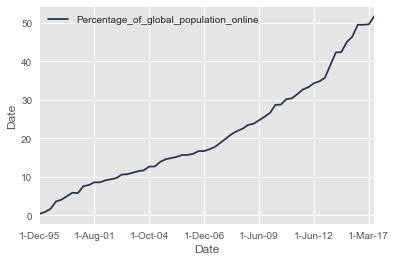

In [601]:
Internet_Users.plot.line(x='Date', y='Percentage_of_global_population_online', color=['#28334e'])
plt.ylabel('Percentage')
plt.ylabel('Date')

### Dataset 2: Data from InternetWorldStats.com

In [444]:
Internet_Users_b = pd.read_csv('./data/2.1 Internet Users_b.csv')
Internet_Users_b.head(10)

,regions,penetration,year,indicator
0,Africa,28.6,2016,penetration rate
1,Asia,44.2,2016,penetration rate
2,Europe,73.9,2016,penetration rate
3,Latin America / Caribbean,61.5,2016,penetration rate
4,Middle East,53.7,2016,penetration rate
5,North America,89.0,2016,penetration rate
6,Oceania / Australia,73.3,2016,penetration rate
7,Africa,31.2,2017,penetration rate
8,Asia,46.7,2017,penetration rate
9,Europe,80.2,2017,penetration rate


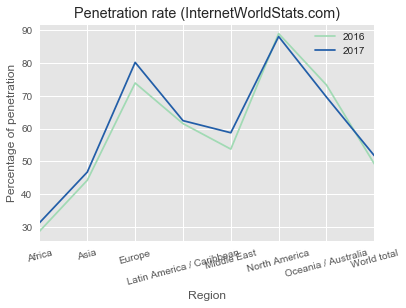

In [445]:
# create two new Dataframes, one where Element is TMIN, one TMAX
dfmin = Internet_Users_b[Internet_Users_b['year'] == 2016]
dfmax = Internet_Users_b[(Internet_Users_b['year'] == 2017) & (Internet_Users_b['indicator'] == 'penetration rate')]
# plot both dataframes 
ax = dfmin.plot('regions', 'penetration', color='#a1dab4')
dfmax.plot('regions', 'penetration', ax=ax, color='#225ea8', rot=15)
#ax.figure.autofmt_xdate()
plt.title("Penetration rate (InternetWorldStats.com)")
plt.xlabel("Region")
plt.ylabel("Percentage of penetration")
ax.legend(["2016", "2017"])
plt.show()

### Dataset 3: Data from ITU

In [446]:
Internet_Users_c = pd.read_csv('./data/2.1 Internet Users_c.csv')
Internet_Users_c

,regions,penetration,year,indicator
0,Africa,19.90,2016,penetration rate
1,Arab States,41.80,2016,penetration rate
2,Asia & Pacific,41.50,2016,penetration rate
3,CIS,65.10,2016,penetration rate
4,Europe,77.90,2016,penetration rate
5,The Americas,64.00,2016,penetration rate
6,WORLD,45.90,2016,penetration rate
7,Africa,21.80,2017,penetration rate
8,Arab States,43.70,2017,penetration rate
9,Asia & Pacific,43.90,2017,penetration rate


In [447]:
# create two new Dataframes
dfmin = Internet_Users_c[Internet_Users_c['year'] == 2016]
dfmax = Internet_Users_c[(Internet_Users_c['year'] == 2017) & (Internet_Users_c['indicator'] == 'penetration rate')]

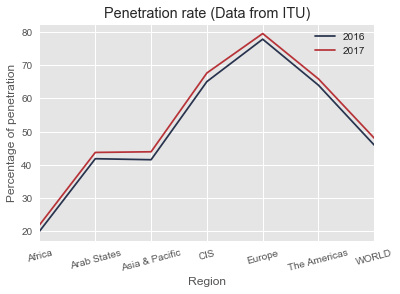

In [602]:
# plot both dataframes 
ax = dfmin.plot('regions', 'penetration', color='#28334e', legend=False)
dfmax.plot('regions', 'penetration', ax=ax, legend= False, color='#b73338', rot=15)
#ax.figure.autofmt_xdate()
plt.title("Penetration rate (Data from ITU)")
plt.xlabel("Region")
plt.ylabel("Percentage of penetration")
ax.legend(["2016", "2017"])
plt.show()

# 2.1 Users by Country

### Dataset 1: Internet users by country 30-June-2017

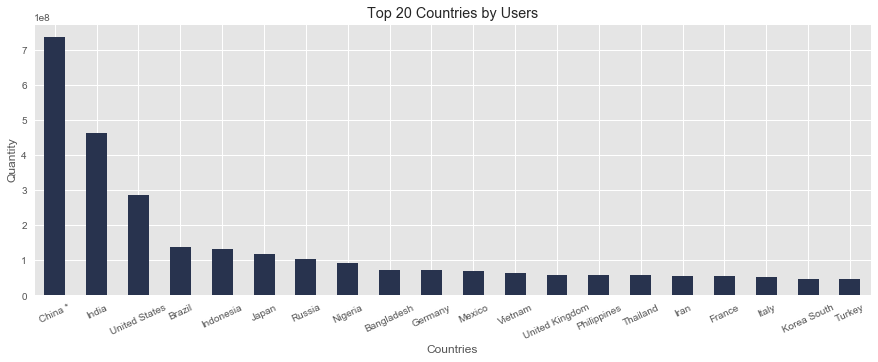

In [600]:
Users_by_Country = pd.read_csv('./data/2.1 Users by Country_a.csv')
Users_by_Country=Users_by_Country.head(20)

Users_by_Country.plot.bar(x='country', y='users', figsize=(15,5), legend=False,rot=25, color=['#28334e'])
plt.title('Top 20 Countries by Users')
plt.xlabel('Countries')
plt.ylabel('Quantity')

### Dataset 2: Penetration rate by country

In [591]:
Users_by_Country_b = pd.read_csv('./data/2.1 Users by Country_b.csv')
Users_by_Country_b.head(3)

,country,penetration,year,indicator
0,China *,52.3,2016,penetration rate
1,India,36.5,2016,penetration rate
2,United States,87.4,2016,penetration rate


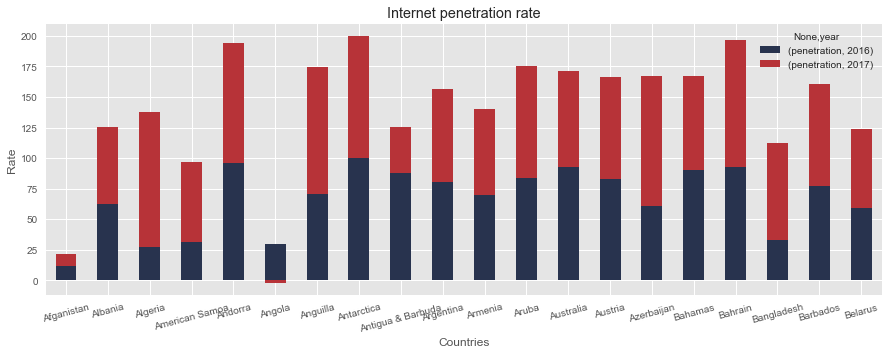

In [599]:
Users_by_Country_b=Users_by_Country_b.groupby(['country','year']).sum()
#Users_by_Country_b.unstack().head()
my_plot = Users_by_Country_b.unstack().head(20).plot(kind='bar',stacked=True,title="Internet penetration rate", rot=15, figsize=(15,5), color=['#28334e', '#b73338'])
my_plot.set_xlabel("Countries")
my_plot.set_ylabel("Rate")

In [513]:
df_test = Users_by_Country_b[(Users_by_Country_b['year'] == 2017) & (Users_by_Country_b['indicator'] == 'penetration rate')]
#sub_df1 = df_test.groupby(['year', 'country'])['penetration'].sum()
#sub_df1

In [514]:
last_2017 = df_test.sort_values('penetration', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
top_2017 = df_test.sort_values('penetration', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
top_2017 = top_2017.head(20)
last_2017 = last_2017.head(20)

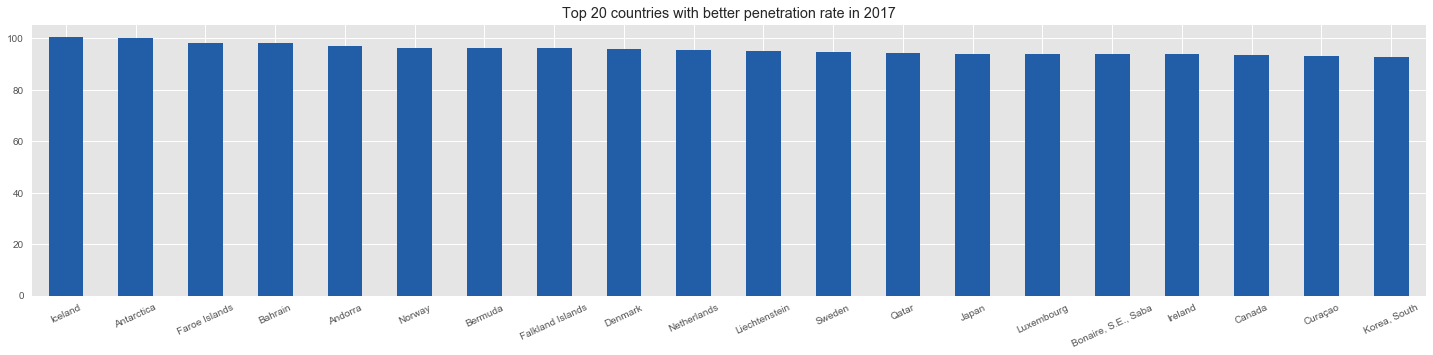

In [515]:
top_2017.plot.bar(x='country', y='penetration', figsize=(25,5), legend=False,rot=25, color=['#225ea8'])
plt.title('Top 20 countries with better penetration rate in 2017')
plt.xlabel('')
plt.ylabel('')

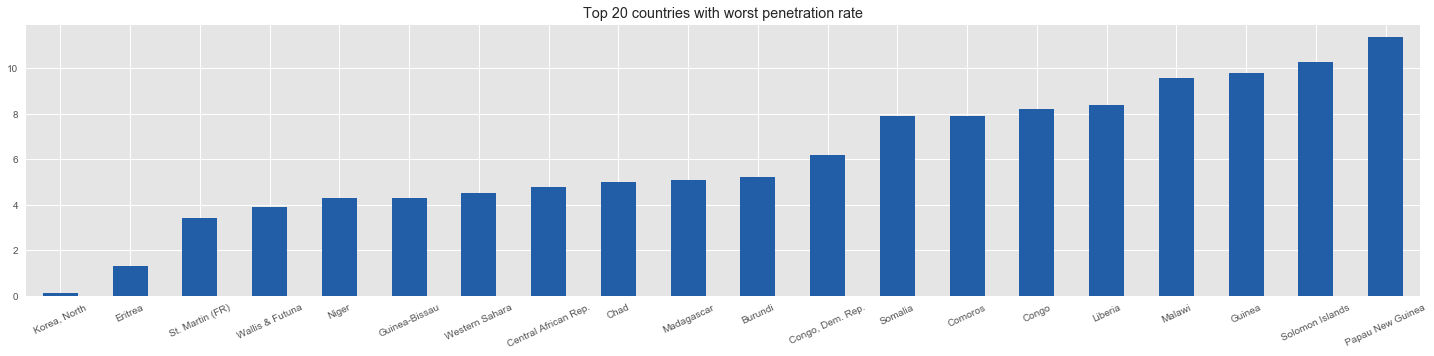

In [516]:
last_2017.plot.bar(x='country', y='penetration', figsize=(25,5), legend=False,rot=25, color=['#225ea8'])
plt.title('Top 20 countries with worst penetration rate')
plt.xlabel('')
plt.ylabel('')

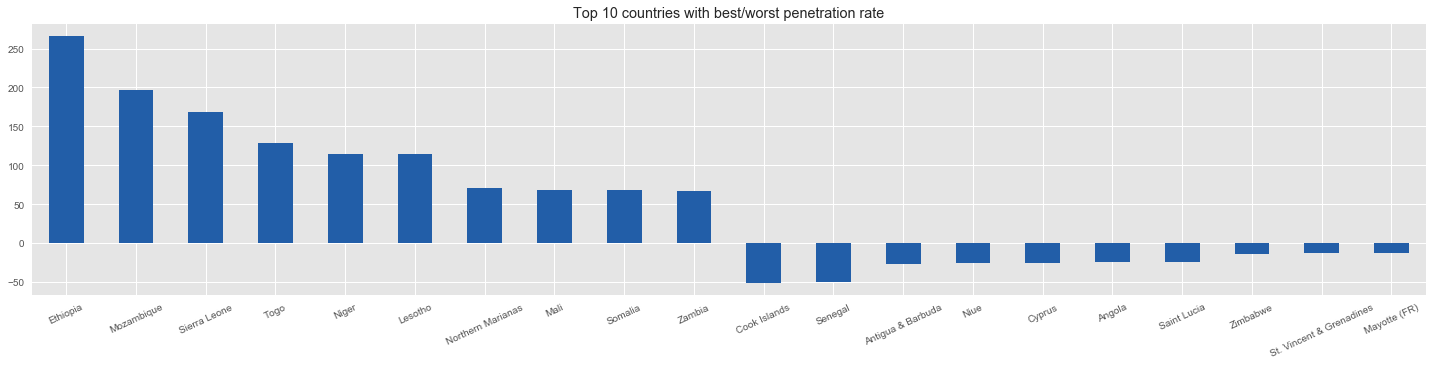

In [523]:
top_yoy = top_yoy.head(10)
last_yoy = last_yoy.head(10)
result = pd.concat([top_yoy, last_yoy])
result.plot.bar(x='country', y='penetration', figsize=(25,5), legend=False,rot=25, color=['#225ea8'])
plt.title('Top 10 countries with best/worst penetration rate')
plt.xlabel('')
plt.ylabel('')

# 2.1 Mobile Connectivity Index

In [423]:
Mobile_Connectivity_Index = pd.read_csv('./data/2.1 Mobile Connectivity Index.csv')
Mobile_Connectivity_Index

,country,value,year,indicator
0,Australia,83.326169,2014,Mobile connectivity Index
1,Norway,81.277320,2014,Mobile connectivity Index
2,New Zealand,80.259606,2014,Mobile connectivity Index
3,Finland,79.769510,2014,Mobile connectivity Index
4,Singapore,79.963534,2014,Mobile connectivity Index
5,Sweden,80.394811,2014,Mobile connectivity Index
6,Denmark,79.080307,2014,Mobile connectivity Index
7,Netherlands,79.295494,2014,Mobile connectivity Index
8,Iceland,78.813253,2014,Mobile connectivity Index
9,Switzerland,79.349683,2014,Mobile connectivity Index


### Igual que los gráficos anteriores (Stacked Bar)

# 2.1 Mobile & Broadband
### Dataset 1:

In [62]:
Mobile_Broadband_a = pd.read_csv('./data/2.1 Mobile & Broadband.csv')
Mobile_Broadband_a

,region,value,year,indicator,broadband
0,Africa,22.90,2016,penetration rate,Mobile
1,Arab States,45.20,2016,penetration rate,Mobile
2,Asia & Pacific,47.40,2016,penetration rate,Mobile
3,CIS,59.70,2016,penetration rate,Mobile
4,Europe,80.10,2016,penetration rate,Mobile
5,The Americas,82.70,2016,penetration rate,Mobile
6,Africa,26.00,2017,penetration rate,Mobile
7,Arab States,47.20,2017,penetration rate,Mobile
8,Asia & Pacific,52.20,2017,penetration rate,Mobile
9,CIS,64.20,2017,penetration rate,Mobile


# 2.1 Mobile & Broadband_b
### Dataset 2

Mobile_Broadband_b = pd.read_csv('./data/2.1 Mobile & Broadband_b.csv')
Mobile_Broadband_b

In [581]:
Mobile_Broadband_b = pd.read_csv('./data/2.1 Mobile & Broadband_b_NOT PIVOTED.csv')
Mobile_Broadband_b

,Global Total (per 100 inhabitants),2015,2016,2017*,YoY Change
0,Mobile-cellular telephone subscriptions,98.2,101.5,103.5,1.97
1,Individuals using the Internet,43.2,45.9,48.0,4.58
2,Fixed-telephone subscriptions,14.3,13.6,13.0,-4.41
3,Active mobile-broadband subscriptions,45.1,52.2,56.4,8.05
4,Fixed-broadband subscriptions,11.5,12.4,13.1,5.65


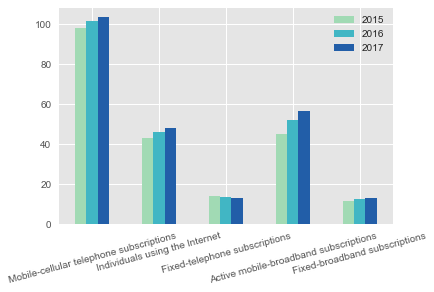

In [584]:
df2 = pd.DataFrame(Mobile_Broadband_b, columns=['2015', '2016', '2017*'])
df2.plot(kind='bar', x=Mobile_Broadband_b['Global Total (per 100 inhabitants)'],rot=15, color=['#a1dab4', '#41b6c4', '#225ea8'])
plt.xlabel('')
plt.ylabel('')
plt.legend(['2015', '2016', '2017'])

# 2.1 Youth Internet Penetration

In [74]:
Youth_Internet_Penetration = pd.read_csv('./data/2.1 Youth Internet Penetration.csv')
Youth_Internet_Penetration

,region,value,indicator
0,Arab States,43.70,Total internet population
1,Asia & Pacific,43.90,Total internet population
2,CIS,67.70,Total internet population
3,Europe,79.60,Total internet population
4,The Americas,65.90,Total internet population
5,WORLD,48.00,Total internet population
6,Arab States,64.20,Ages 15-24 population
7,Asia & Pacific,72.30,Ages 15-24 population
8,CIS,89.60,Ages 15-24 population
9,Europe,95.70,Ages 15-24 population


# 2.2 Internet Speed Growth

In [76]:
Internet_Speed_Growth = pd.read_csv('./data/2.2 Internet Speed Growth.csv')
Internet_Speed_Growth

,region,value,year,indicator
0,Africa,1.181802e+06,2012,count
1,Africa,1.017123e+06,2013,count
2,Africa,1.009276e+06,2014,count
3,Africa,6.864910e+05,2015,count
4,Africa,1.853620e+06,2016,count
5,Africa,2.303070e+05,2017,count
6,North America,7.512342e+06,2012,count
7,North America,6.004239e+06,2013,count
8,North America,5.783507e+06,2014,count
9,North America,6.462305e+06,2015,count


# 2.2 Mobile Speed

In [77]:
Mobile_Speed = pd.read_csv('./data/2.2 Mobile Speed.csv')
Mobile_Speed

,country,value,year,indicator,report
0,United Kingdom,23.10,2016,Average Mbps,Q2 Report
1,Cyprus *,20.00,2016,Average Mbps,Q2 Report
2,Germany,17.00,2016,Average Mbps,Q2 Report
3,Switzerland *,19.30,2016,Average Mbps,Q2 Report
4,Finland,15.60,2016,Average Mbps,Q2 Report
5,France,12.70,2016,Average Mbps,Q2 Report
6,Norway,15.60,2016,Average Mbps,Q2 Report
7,Denmark,11.70,2016,Average Mbps,Q2 Report
8,Belgium,21.10,2016,Average Mbps,Q2 Report
9,Romania,10.90,2016,Average Mbps,Q2 Report


# 2.3 Language

In [79]:
Language = pd.read_csv('./data/2.3 Language.csv')
Language

,Language,value,indicator,year
0,English,25.50,Share of Users,2017
1,Chinese,20.40,Share of Users,2017
2,Spanish,7.90,Share of Users,2017
3,Arabic,4.60,Share of Users,2017
4,Portuguese,4.10,Share of Users,2017
5,Indonesian / Malaysian,4.10,Share of Users,2017
6,Japanese,3.20,Share of Users,2017
7,Russian,2.80,Share of Users,2017
8,French,2.70,Share of Users,2017
9,German,2.20,Share of Users,2017


# 2.4 Gender Gap

In [80]:
#Quedé aqui: https://docs.google.com/spreadsheets/d/1Oy50yohqchV4tpIdsLdFohiLoknwfb2ECxi-teJw5y4/edit#gid=583398822

In [81]:
gender_gap_a = pd.read_csv('./data/2.4 Gender Gap_a.csv')
gender_gap_a

,country,year,Individuals,Male,Female,Gap,Interpretation
0,Jamaica,2015,42.2,39.4,44.9,5.5,Female
1,Cuba,2015,37.3,34.9,39.7,4.8,Female
2,Venezuela,2012,49.1,47.5,50.6,3.1,Female
3,Panama,2015,51.2,49.9,52.5,2.6,Female
4,Ireland,2016,85.0,84.0,86.0,2.0,Female
5,Puerto Rico,2015,63.5,62.6,64.2,1.6,Female
6,Bahrain,2016,98.0,97.5,99.0,1.5,Female
7,Denmark,2016,97.0,96.4,97.5,1.1,Female
8,New Zealand,2012,81.6,81.2,82.2,1.0,Female
9,Paraguay,2015,48.4,48.0,48.8,0.8,Female


In [82]:
gender_gap_b = pd.read_csv('./data/2.4 Gender Gap_b.csv')
gender_gap_b

,Region,value,gender,year,indicator
0,Africa,24.9,male,2017,Estimates by ITU
1,Arab States,47.7,male,2017,Estimates by ITU
2,Asia & Pacific,47.9,male,2017,Estimates by ITU
3,The Americas,65.1,male,2017,Estimates by ITU
4,CIS,69.8,male,2017,Estimates by ITU
5,Europe,82.9,male,2017,Estimates by ITU
6,World,50.9,male,2017,Estimates by ITU
7,Developed,82.2,male,2017,Estimates by ITU
8,Developing,44.7,male,2017,Estimates by ITU
9,LDCs,21.0,male,2017,Estimates by ITU


In [84]:
gender_gap_c = pd.read_csv('./data/2.4 Gender Gap_c.csv')
gender_gap_c

,Region,value,indicator,year
0,Africa,20.70,Internet User Gender Gap,2013
1,Arab States,19.20,Internet User Gender Gap,2013
2,Asia & Pacific,17.40,Internet User Gender Gap,2013
3,The Americas,-0.40,Internet User Gender Gap,2013
4,CIS,7.50,Internet User Gender Gap,2013
5,Europe,9.40,Internet User Gender Gap,2013
6,World,11.00,Internet User Gender Gap,2013
7,Developed,5.80,Internet User Gender Gap,2013
8,Developing,15.80,Internet User Gender Gap,2013
9,LDCs,29.90,Internet User Gender Gap,2013


# 2.5 Online Harassment

In [86]:
Online_Harassment = pd.read_csv('./data/2.5 Online Harassment.csv')
Online_Harassment

,type,value,year,indicator
0,Total,35.00,2014,experienced online harrassment
1,Offensive name-calling,23.00,2014,experienced online harrassment
2,Purposeful embarrassment,19.00,2014,experienced online harrassment
3,Physical threats,7.00,2014,experienced online harrassment
4,Stalking,7.00,2014,experienced online harrassment
5,Sustained harassment,6.00,2014,experienced online harrassment
6,Sexual harassment,5.00,2014,experienced online harrassment
7,Total,41.00,2017,experienced online harrassment
8,Offensive name-calling,27.00,2017,experienced online harrassment
9,Purposeful embarrassment,22.00,2017,experienced online harrassment


# 2.7 Diversity

In [128]:
Diversity = pd.read_csv('./data/2.7 Diversity.csv')
Diversity

,name,value,ethnic,year
0,Facebook,33,Female,2016
1,Instagram,31,Female,2016
2,Google+,30,Female,2016
3,YouTube,30,Female,2016
4,LinkedIn,42,Female,2016
5,Pinterest,40,Female,2016
6,Tumblr,37,Female,2016
7,Flickr,37,Female,2016
8,Twitter,30,Female,2016
9,Secret,50,Female,2016


# 2.8 Mobile Data Price

In [87]:
Mobile_Data_Price_a = pd.read_csv('./data/2.8 Mobile Data Price_a.csv')
Mobile_Data_Price_a

,region,value,year,indicator
0,World,8.3,2013,Price per 1gb of mobile data as a percentage o...
1,Developed,1.0,2013,Price per 1gb of mobile data as a percentage o...
2,Developing,11.6,2013,Price per 1gb of mobile data as a percentage o...
3,LDCs,32.4,2013,Price per 1gb of mobile data as a percentage o...
4,World,4.3,2016,Price per 1gb of mobile data as a percentage o...
5,Developed,0.7,2016,Price per 1gb of mobile data as a percentage o...
6,Developing,6.0,2016,Price per 1gb of mobile data as a percentage o...
7,LDCs,14.1,2016,Price per 1gb of mobile data as a percentage o...


In [88]:
Mobile_Data_Price_b = pd.read_csv('./data/2.8 Mobile Data Price_b.csv')
Mobile_Data_Price_b

,region,value,year,indicator,population
0,Africa,36.91,2013,Price per 1gb of mobile plan as a percentage o...,"1,246,504,865"
1,Asia & Pacific,9.62,2013,Price per 1gb of mobile plan as a percentage o...,"4,438,985,092"
2,Europe,2.05,2013,Price per 1gb of mobile plan as a percentage o...,"822,710,362"
3,LAC,5.65,2013,Price per 1gb of mobile plan as a percentage o...,"647,604,645"
4,North America,1.04,2013,Price per 1gb of mobile plan as a percentage o...,"363,224,006"
5,Africa,24.99,2014,Price per 1gb of mobile plan as a percentage o...,"1,246,504,865"
6,Asia & Pacific,6.46,2014,Price per 1gb of mobile plan as a percentage o...,"4,438,985,092"
7,Europe,1.37,2014,Price per 1gb of mobile plan as a percentage o...,"822,710,362"
8,LAC,5.16,2014,Price per 1gb of mobile plan as a percentage o...,"647,604,645"
9,North America,0.84,2014,Price per 1gb of mobile plan as a percentage o...,"363,224,006"


# 3.1 Net Neutrality

In [89]:
Net_Neutrality = pd.read_csv('./data/3.1 Net Neutrality.csv')
Net_Neutrality

,country,category,year
0,Argentina,Protections,2016
1,Australia,Considering protections,2016
2,Austria,Considering protections,2016
3,Belgium,Considering protections,2016
4,Brazil,Protections,2016
5,Bulgaria,Considering protections,2016
6,Canada,Protections,2016
7,Chile,Protections,2016
8,China,Considering protections,2016
9,Colombia,Protections,2016


# 3.2 Market Share for Browsers

In [90]:
Market_Share_for_Browsers = pd.read_csv('./data/3.2 Market Share for Browsers.csv')
Market_Share_for_Browsers

,product,value,year,indicator
0,Chrome,61.18,2016,Desktop Share
1,Firefox,15.45,2016,Desktop Share
2,IE,12.11,2016,Desktop Share
3,Safari,4.79,2016,Desktop Share
4,Edge,2.64,2016,Desktop Share
5,Opera,1.89,2016,Desktop Share
6,Yandex Browser,0.50,2016,Desktop Share
7,Other,1.44,2016,Desktop Share
8,Chrome,63.58,2017,Desktop Share
9,Firefox,13.73,2017,Desktop Share


In [606]:
share_2016=Market_Share_for_Browsers[(Market_Share_for_Browsers['year']==2016) & (Market_Share_for_Browsers['indicator']=='Desktop Share') ]
share_2016

,product,value,year,indicator
0,Chrome,61.18,2016,Desktop Share
1,Firefox,15.45,2016,Desktop Share
2,IE,12.11,2016,Desktop Share
3,Safari,4.79,2016,Desktop Share
4,Edge,2.64,2016,Desktop Share
5,Opera,1.89,2016,Desktop Share
6,Yandex Browser,0.50,2016,Desktop Share
7,Other,1.44,2016,Desktop Share


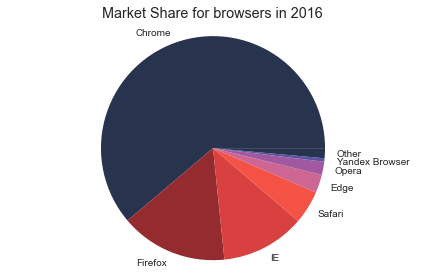

In [637]:
colors = ["#28334e", "#932b2f", "#d94141", "#f55246", "#ce6693","#a059a0","#5c53a5"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    share_2016['value'],
    # with the labels being officer names
    labels=share_2016['product'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors
    )

# View the plot drop above
plt.axis('equal')
plt.title('Market Share for browsers in 2016')


# View the plot
plt.tight_layout()
plt.show()

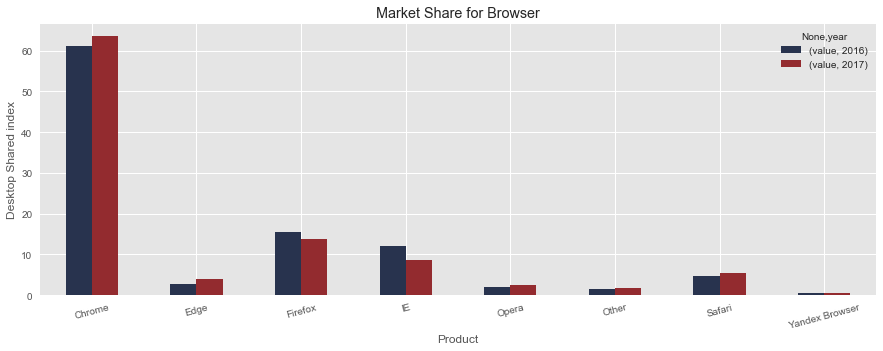

In [636]:
Market_Share_for_Browsers_test=Market_Share_for_Browsers[Market_Share_for_Browsers['indicator']=='Desktop Share']

my_plot = Market_Share_for_Browsers_test.groupby(['product','year']).sum().unstack().plot(kind='bar',stacked=False,title="Market Share for Browser", rot=15, figsize=(15,5), color = ["#28334e", "#932b2f", "#d94141", "#f55246", "#f55200", "#f54546", "#f53046"])
my_plot.set_xlabel("Product")
my_plot.set_ylabel("Desktop Shared index")

# 3.2 Market Share for Social

In [92]:
Market_Share_for_Social = pd.read_csv('./data/3.2 Market Share for Social.csv')
Market_Share_for_Social

,name,value,year,indicator
0,Facebook,1712000000,2016,Social Network
1,WhatsApp,1000000000,2016,Social Network
2,Facebook Messenger,1000000000,2016,Social Network
3,QQ,899000000,2016,Social Network
4,WeChat,806000000,2016,Social Network
5,QZone,652000000,2016,Social Network
6,Tumblr,555000000,2016,Social Network
7,Instagram,500000000,2016,Social Network
8,Twitter,313000000,2016,Social Network
9,Baidu Tieba,300000000,2016,Social Network


In [108]:
facebook_owned = Market_Share_for_Social[(Market_Share_for_Social['name']=='Facebook') | 
                                         (Market_Share_for_Social['name']=='WhatsApp') | 
                                         (Market_Share_for_Social['name']=='Facebook Messenger') | 
                                         (Market_Share_for_Social['name']=='Instagram')]
facebook_owned

,name,value,year,indicator
0,Facebook,1712000000,2016,Social Network
1,WhatsApp,1000000000,2016,Social Network
2,Facebook Messenger,1000000000,2016,Social Network
7,Instagram,500000000,2016,Social Network
21,Facebook,2047000000,2017,Social Network
22,WhatsApp,1200000000,2017,Social Network
23,Facebook Messenger,1200000000,2017,Social Network
28,Instagram,700000000,2017,Social Network
42,Facebook,19.57%,2017,Social Network YoY Change
43,WhatsApp,20.00%,2017,Social Network YoY Change


In [110]:
Market_Share_for_Social[(Market_Share_for_Social['name']=='Facebook') & (Market_Share_for_Social['year'] == 2016)]

,name,value,year,indicator
0,Facebook,1712000000,2016,Social Network


# 3.2 Market Share for Search

In [112]:
Market_Share_for_Search = pd.read_csv('./data/3.2 Market Share for Search.csv')
Market_Share_for_Search

,search_engine,value,year,indicator,type
0,Google,77.82,2016,NetMarketShare,Desktop
1,Bing,7.96,2016,NetMarketShare,Desktop
2,Baidu,6.37,2016,NetMarketShare,Desktop
3,Yahoo,6.39,2016,NetMarketShare,Desktop
4,Ask,0.15,2016,NetMarketShare,Desktop
5,AOL,0.08,2016,NetMarketShare,Desktop
6,Excite,0.01,2016,NetMarketShare,Desktop
7,Other,1.22,2016,NetMarketShare,Desktop
8,Google,81.62,2017,NetMarketShare,Desktop
9,Bing,7.04,2017,NetMarketShare,Desktop


In [658]:
#Market_Share_for_Search_test=Market_Share_for_Search[(Market_Share_for_Search['indicator']=='StatCounter')]
Market_Share_for_Search_test=Market_Share_for_Search[(Market_Share_for_Search['indicator']=='NetMarketShare')]

a=Market_Share_for_Search_test.sort_values(['year', 'value'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
a.groupby(['search_engine', 'year','indicator','type']).sum()

value
search_engine year indicator      type          
AOL           2016 NetMarketShare Desktop   0.08
                                  Mobile    0.01
              2017 NetMarketShare Desktop   0.04
                                  Mobile    0.00
Ask           2016 NetMarketShare Desktop   0.15
                                  Mobile    0.04
              2017 NetMarketShare Desktop   0.15
                                  Mobile    0.02
Baidu         2016 NetMarketShare Desktop   6.37
                                  Mobile    0.37
              2017 NetMarketShare Desktop   5.21
                                  Mobile    0.47
Bing          2016 NetMarketShare Desktop   7.96
                                  Mobile    1.06
              2017 NetMarketShare Desktop   7.04
                                  Mobile    0.67
Excite        2016 NetMarketShare Desktop   0.01
              2017 NetMarketShare Desktop   0.02
Google        2016 NetMarketShare Desktop  77.82
                                  Mobile   93.76
              2017 NetMarketShare Desktop  81.62
                                  Mobile   97.07
Other         2016 NetMarketShare Desktop   1.22
              2017 NetMarketShare Desktop   1.28
Yahoo         2016 NetMarketShare Desktop   6.39
                                  Mobile    4.01
              2017 NetMarketShare Desktop   4.64
                                  Mobile    1.18

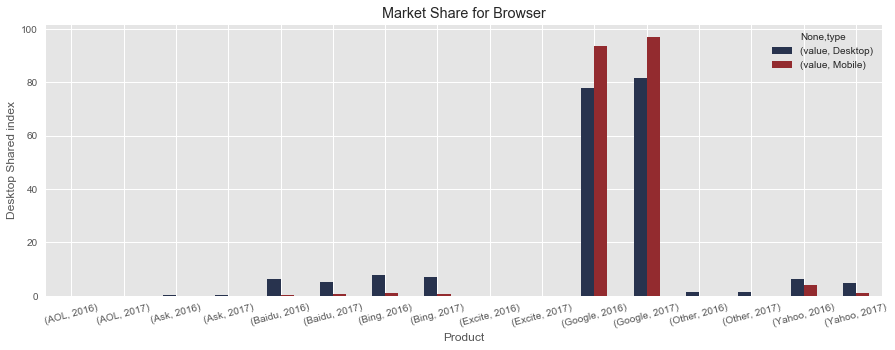

In [656]:
my_plot = a.groupby(['search_engine', 'year','type']).sum().unstack().plot(kind='bar',stacked=False,title="Market Share for Browser", rot=15, figsize=(15,5), color = ["#28334e", "#932b2f", "#d94141", "#f55246", "#f55200", "#f54546", "#f53046"])
my_plot.set_xlabel("Product")
my_plot.set_ylabel("Desktop Shared index")

# 3.3 Ownership (Documento vacío)

# 3.4 Top Phone Makers

In [114]:
Top_Phone_Makers = pd.read_csv('./data/3.4 Top Phone Makers.csv')
Top_Phone_Makers

,name,value,year,indicator,source
0,Samsung,22.7,Q2 2016,Makers market share,NaN
1,Apple,11.7,Q2 2016,Makers market share,NaN
2,Huawei,9.3,Q2 2016,Makers market share,NaN
3,Oppo,6.6,Q2 2016,Makers market share,NaN
4,Xiaomi,3.9,Q2 2016,Makers market share,NaN
5,Other,45.9,Q2 2016,Makers market share,NaN
6,Samsung,23.3,Q2 2017,Makers market share,NaN
7,Apple,12,Q2 2017,Makers market share,NaN
8,Huawei,11.3,Q2 2017,Makers market share,NaN
9,Oppo,8.1,Q2 2017,Makers market share,NaN


# 3.5 IPv6 Adoption

In [116]:
IPv6_Adoption = pd.read_csv('./data/3.5 IPv6 Adoption.csv')
IPv6_Adoption

,Year,Month,Day,Total IPv6 %,non-relayed IPv6,Moving Average
0,2017,8,12,16.681415,16.658104,18.088064
1,2017,8,11,16.763412,16.740792,18.116533
2,2017,8,10,19.830628,19.803136,18.123700
3,2017,8,9,20.497795,20.468522,17.842004
4,2017,8,8,17.791575,17.766954,17.766381
5,2017,8,7,16.963556,16.940368,18.257329
6,2017,8,6,16.852235,16.830016,18.501269
7,2017,8,5,16.806408,16.783726,18.607323
8,2017,8,4,18.140456,18.116445,18.664220
9,2017,8,3,20.044058,20.015279,18.471918


# 3.5 IPv6 Adoption by Country

In [118]:
IPv6_Adoption_by_Country = pd.read_csv('./data/3.5 IPv6 Adoption by Country.csv')
IPv6_Adoption_by_Country

,ISO_2,Country,Native IPv6 %,Latency,Impact,Color Index
0,BE,Belgium,49.20,10,0.01,49.20
1,US,United States,33.31,0,-0.01,33.31
2,GR,Greece,33.04,-150,-0.12,33.04
3,DE,Germany,31.83,0,0.00,31.83
4,CH,Switzerland,28.18,0,0.00,28.18
5,LU,Luxembourg,24.05,0,0.00,24.05
6,IN,India,22.93,-10,-0.02,22.93
7,BR,Brazil,21.77,-40,-0.02,21.77
8,JP,Japan,20.31,10,0.00,20.31
9,FR,France,19.74,0,0.00,19.74


# 3.8 Clean Energy Use

In [120]:
Clean_Energy_Use = pd.read_csv('./data/3.8 Clean Energy Use.csv')
Clean_Energy_Use

,Company,Grade
0,Adobe,B
1,Alibaba,D
2,Amazon,C
3,Apple,A
4,Baidu,F
5,Facebook,A
6,Google,A
7,Hewlett Packard,C
8,IBM,C
9,Microsoft,B


# 4.1 HTTPS Adoption Rate 
# VACÍO

# 4.1 HTTPS By Country

In [121]:
HTTPS_By_Country = pd.read_csv('./data/4.1 HTTPS By Country.csv')
HTTPS_By_Country

,ISO_2,SecureLoads,Loads,Rate
0,MY,69728224,88492079,78.80%
1,PH,83682463,116102962,72.08%
2,HU,11954957,16226252,73.68%
3,RS,14801446,18047726,82.01%
4,SE,13796847,33784497,40.84%
5,ZW,6598588,8796975,75.01%
6,UA,18917759,24714036,76.55%
7,GH,27168176,36586761,74.26%
8,DK,6151976,7864344,78.23%
9,CZ,18059265,22337485,80.85%


# 4.2 Data Breaches
### Dataset 1

In [123]:
Data_Breaches = pd.read_csv('./data/4.2 Data Breaches.csv')
Data_Breaches

,Entity,Year,value,Organization type,Method
0,Equifax,2017,143000000,"financial, credit reporting",hacked
1,Erie County Medical Center,2017,unknown,healthcare,poor security
2,Grozio Chirurgija,2017,25000,healthcare,hacked
3,Taringa,2017,28722877,web,hacked
4,21st Century Oncology,2016,2200000,healthcare,hacked
5,Apple Health Medicaid,2016,91000,healthcare,poor security
6,Central Coast Credit Union,2016,60000,financial,hacked
7,Commission on Elections,2016,55000000,government,hacked
8,Cox Communications,2016,40000,telecoms,hacked
9,Democratic National Committee,2016,19252,political,NaN


### Dataset 2

In [124]:
Data_Breaches_b = pd.read_csv('./data/4.2 Data Breaches_b.csv')
Data_Breaches_b

,Sector,value,year
0,Business,177,2011
1,Educational,57,2011
2,Govt,54,2011
3,Health,102,2011
4,Banking,31,2011
5,Business,162,2012
6,Educational,63,2012
7,Govt,55,2012
8,Health,167,2012
9,Banking,24,2012


# 4.2 Adoption of standards
# Vacío

# 4.4 Digital Rights CAI

In [125]:
Digital_Rights_CAI = pd.read_csv('./data/4.4 Digital Rights CAI.csv')
Digital_Rights_CAI

,name,type,value,indicator
0,Google,Internet,64.72,Total
1,Microsoft,Internet,62.49,Total
2,Yahoo,Internet,58.16,Total
3,Facebook,Internet,52.67,Total
4,Kakao,Internet,50.06,Total
5,AT&T,Telco,48.41,Total
6,Vodafone,Telco,48.11,Total
7,Twitter,Internet,47.73,Total
8,Apple,Internet,35.26,Total
9,Telefónica,Telco,33.40,Total


# 4.5 Encryption Laws

In [126]:
Encryption_Laws = pd.read_csv('./data/4.5 Encryption Laws.csv')
Encryption_Laws

,country,type_of_policy,current_framework
0,Afghanistan,General right to encryption,No known legislation
1,Afghanistan,Import/export controls,No known legislation
2,Afghanistan,Licensing/registration requirements,No known legislation
3,Afghanistan,Min/max standards,No known legislation
4,Afghanistan,Powers to intercept/decrypt encrypted communic...,No known legislation
5,Afghanistan,Other restrictions,No known legislation
6,Albania,General right to encryption,No known legislation
7,Albania,Import/export controls,No known legislation
8,Albania,Licensing/registration requirements,No known legislation
9,Albania,Min/max standards,No known legislation


# 4.6 Connected Devices

In [127]:
Connected_Devices = pd.read_csv('./data/4.6 Connected Devices.csv')
Connected_Devices

,year,IoT Devices
0,2015,15410000000
1,2016,17680000000
2,2017,20350000000
3,2018,23140000000
4,2019,26660000000
5,2020,30730000000
6,2021,35820000000
7,2022,42620000000


# 5.1 Digital Skills / 5.1 Equal Rating / 5.x Day on the web / 5.2 Skills in EU / 5.3 App Unhappiness
# Vacío

# Countries data (for ISO codes)